# import libraries 

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time 
import mediapipe as mp

# keypoints using mp holistics

In [2]:
webcam = cv2.VideoCapture(0)
key = cv2.waitKey(1)

In [3]:
#holistics model
mp_holistics = mp.solutions.holistic

#drawing utilites
mp_drawing = mp.solutions.drawing_utils

In [4]:
def mediapipe_detection(image, model):
    
    #converting the image to rgb from bgr
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    #setting image to be not writable
    image.flags.writeable = False
    #make prediction
    results = model.process(image)
    #setting image to be writable
    image.flags.writeable = True
    
    #converting the image back to bgr from rgb
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results

In [5]:
def draw_landmark(image, results):
    # drawing face connectings
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistics.FACEMESH_TESSELATION)
    # drawing pose connectings
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistics.POSE_CONNECTIONS)
    # drawing left-hand connectings
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistics.HAND_CONNECTIONS)
    # drawing right-hand connectings
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistics.HAND_CONNECTIONS)

In [6]:
def draw_styled_landmark(image, results):
    # drawing face connectings
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistics.FACEMESH_TESSELATION,
                             mp_drawing.DrawingSpec(color=(100,100,100), thickness=1, circle_radius=1),# to color lankmark
                             mp_drawing.DrawingSpec(color=(10,256,121), thickness=1, circle_radius=1))# to color connections
    # drawing pose connectings
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistics.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(150,150,150), thickness=2, circle_radius=2),
                             mp_drawing.DrawingSpec(color=(67,56,221), thickness=2, circle_radius=4))
    # drawing left-hand connectings
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistics.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(190,190,190), thickness=1, circle_radius=3),
                             mp_drawing.DrawingSpec(color=(121,256,221), thickness=2, circle_radius=3))
    # drawing right-hand connectings
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistics.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(197,180,0), thickness=2, circle_radius=3),
                             mp_drawing.DrawingSpec(color=(100,256,121), thickness=2, circle_radius=3))

In [7]:
mp_drawing.draw_landmarks??

In [81]:
#setting mediapipe model
with mp_holistics.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistics:
    while webcam.isOpened():

        #read feed
        successfull_frame_read, frame = webcam.read()

        #make detections
        image, results = mediapipe_detection(frame, holistics)
        
        #draw landmark
        draw_styled_landmark(image, results)

        cv2.imshow('live feed', image)
        key = cv2.waitKey(1)


        # stop if q key is pressed
        if key == 81 or key == 113:
            break
# release the videocapture object
webcam.release()
cv2.destroyAllWindows()


In [9]:
len(results.pose_landmarks.landmark)

33

In [10]:
frame

array([[[ 67,  94,  31],
        [ 65,  92,  30],
        [ 63,  89,  28],
        ...,
        [146, 158, 100],
        [146, 158, 100],
        [148, 160, 102]],

       [[ 65,  92,  29],
        [ 63,  90,  28],
        [ 60,  86,  25],
        ...,
        [148, 159, 102],
        [147, 158, 101],
        [147, 158, 101]],

       [[ 64,  89,  27],
        [ 61,  86,  24],
        [ 62,  87,  26],
        ...,
        [150, 161, 106],
        [148, 159, 103],
        [147, 158, 102]],

       ...,

       [[ 23,  17,   0],
        [ 21,  15,   0],
        [ 20,  14,   0],
        ...,
        [  2,   3,   0],
        [  3,   3,   0],
        [  4,   3,   0]],

       [[ 21,  14,   0],
        [ 20,  13,   0],
        [ 20,  13,   0],
        ...,
        [  2,   3,   0],
        [  3,   3,   0],
        [  4,   3,   0]],

       [[ 20,  13,   0],
        [ 20,  13,   0],
        [ 20,  13,   0],
        ...,
        [  2,   3,   0],
        [  3,   3,   0],
        [  4,   3,   0]]

In [11]:
draw_styled_landmark(frame, results)

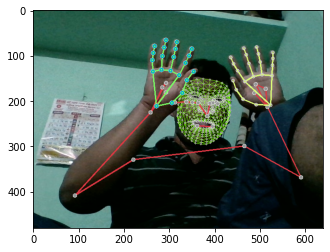

In [12]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# Extract keypoint values

In [13]:
results.pose_landmarks.landmark[0]

x: 0.601251482963562
y: 0.48564884066581726
z: -0.47622114419937134
visibility: 0.9998623728752136

In [14]:
pose =[]
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)


In [15]:
pose

[array([ 0.60125148,  0.48564884, -0.47622114,  0.99986237]),
 array([ 0.61058849,  0.4274388 , -0.41718775,  0.99975079]),
 array([ 0.6207732 ,  0.42554978, -0.41700801,  0.99964821]),
 array([ 0.63130987,  0.42349768, -0.41702938,  0.99968857]),
 array([ 0.56983238,  0.42664117, -0.42385808,  0.99981368]),
 array([ 0.54972023,  0.42436096, -0.42337975,  0.99978405]),
 array([ 0.5287199 ,  0.42111686, -0.423832  ,  0.99987125]),
 array([ 0.63647252,  0.43106046, -0.0715993 ,  0.99967963]),
 array([ 0.49021435,  0.42331818, -0.07311007,  0.99991876]),
 array([ 0.61968726,  0.53501856, -0.34652093,  0.9997164 ]),
 array([ 0.56589913,  0.53168255, -0.35024756,  0.999874  ]),
 array([0.72821617, 0.62479329, 0.08129301, 0.99749589]),
 array([0.34607288, 0.6869123 , 0.00561191, 0.99945515]),
 array([ 0.92376387,  0.76834208, -0.26202029,  0.91863251]),
 array([ 0.14392175,  0.85144496, -0.59317029,  0.99529278]),
 array([ 0.80860794,  0.44532558, -0.51144826,  0.97520405]),
 array([ 0.40552

In [19]:
pose

array([ 6.01251483e-01,  4.85648841e-01, -4.76221144e-01,  9.99862373e-01,
        6.10588491e-01,  4.27438796e-01, -4.17187750e-01,  9.99750793e-01,
        6.20773196e-01,  4.25549775e-01, -4.17008013e-01,  9.99648213e-01,
        6.31309867e-01,  4.23497677e-01, -4.17029381e-01,  9.99688566e-01,
        5.69832385e-01,  4.26641166e-01, -4.23858076e-01,  9.99813676e-01,
        5.49720228e-01,  4.24360961e-01, -4.23379749e-01,  9.99784052e-01,
        5.28719902e-01,  4.21116859e-01, -4.23831999e-01,  9.99871254e-01,
        6.36472523e-01,  4.31060463e-01, -7.15993047e-02,  9.99679625e-01,
        4.90214348e-01,  4.23318177e-01, -7.31100664e-02,  9.99918759e-01,
        6.19687259e-01,  5.35018563e-01, -3.46520931e-01,  9.99716401e-01,
        5.65899134e-01,  5.31682551e-01, -3.50247562e-01,  9.99873996e-01,
        7.28216171e-01,  6.24793291e-01,  8.12930092e-02,  9.97495890e-01,
        3.46072882e-01,  6.86912298e-01,  5.61191468e-03,  9.99455154e-01,
        9.23763871e-01,  

In [20]:
pose.shape

(132,)

In [21]:
len(results.left_hand_landmarks.landmark)

21

In [23]:
len(results.right_hand_landmarks.landmark)

21

In [36]:
len(results.face_landmarks.landmark)*3

1404

In [85]:
def extract_keypoints(results):

    # extracting the keypoint and converting it to np array to avoid error if any part of the pose is not in the frame
    pose =np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks  else np.zeros(132)

    # extracting the keypoint and converting it to np array to avoid error if any part of the right hand is not in the frame
    r_hand = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    
    # extracting the keypoint and converting it to np array to avoid error if any part of the left hand is not in the frame
    l_hand = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    
    # extracting the keypoint and converting it to np array to avoid error if the face is not in the frame
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks  else np.zeros(1404)
    return np.concatenate([pose, face ,l_hand, r_hand])

In [47]:
extract_keypoints(results).shape

(1662,)

In [66]:
result_test = extract_keypoints(results)

In [67]:
np.save('0', result_test)

In [68]:
np.load('0.npy')

array([ 0.60125148,  0.48564884, -0.47622114, ...,  0.41911766,
        0.16563316, -0.0231503 ])

# Setting up folders for collection

In [89]:
# path for exported data, np array
data_path = os.path.join('MP_Data')

# action we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou','seeyoulater', 'yes', 'no', 'help','please'])

#15 videos worth of data
no_sequence = 15

# 20 frames in a video
sequence_length = 15

In [90]:
for action in actions:
    for sequence in range(no_sequence):
        try:
            os.makedirs(os.path.join(data_path, action, str(sequence)))
        except:
            pass

# Collect keypoint values for training and testing

In [91]:
webcam = cv2.VideoCapture(0)

#setting mediapipe model
with mp_holistics.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistics:
    
    # loop through actions
    for action in actions:
        #loop through  video(sequence)
        for sequence in range(no_sequence):
            #loop through video(sequence) length
            for no_frame in range(sequence_length):

                #read feed
                successfull_frame_read, frame = webcam.read()

                #make detections
                image, results = mediapipe_detection(frame, holistics)

                #draw landmark
                draw_styled_landmark(image, results)
                
                #applying wait logic
                if no_frame==0:
                    cv2.putText(image,'STARTING COLLECTION', (120,200),
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0),4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frame for {} video number {}'.format(action, sequence), (15,12),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255),1, cv2.LINE_AA)
                    cv2.imshow('live feed', image)
                    cv2.waitKey(2000)
                else:
                    cv2.putText(image, 'Collecting frame for {} video number {}'.format(action, sequence), (15,12),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255),1, cv2.LINE_AA)
                    cv2.imshow('live feed', image)
                    
                    
                
                #export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(data_path,action, str(sequence), str(no_frame))
                np.save(npy_path, keypoints)
                

                

                key = cv2.waitKey(1)
                # stop if q key is pressed
                if key == 81 or key == 113:
                    break
# release the videocapture object
webcam.release()
cv2.destroyAllWindows()

# Preprocessing data and Create Labels and features

In [92]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [93]:
label_map = {label:num for num, label in enumerate(actions)}

In [94]:
label_map

{'hello': 0,
 'thanks': 1,
 'iloveyou': 2,
 'seeyoulater': 3,
 'yes': 4,
 'no': 5,
 'help': 6,
 'please': 7}

In [96]:
features, labels = [],[]
for action in actions:
    for sequence in range(no_sequence):
        window =[]
        for no_frame in range(sequence_length):
            res = np.load(os.path.join(data_path, action, str(sequence), "{}.npy".format(no_frame)))
            window.append(res)
        features.append(window)
        labels.append(label_map[action])

In [100]:
x=np.array(features)
x.shape

(120, 15, 1662)

In [102]:
np.array(labels).shape

(120,)

In [103]:
y = to_categorical(labels).astype(int)

In [104]:
y

array([[1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0,

In [105]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [113]:
x_train.shape

(96, 15, 1662)

# Build and Train Test LSTM Neural Network

In [111]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [112]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [162]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(15,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [164]:
model.compile(optimizer='Adam', loss = 'categorical_crossentropy', metrics = ['categorical_accuracy'])

In [167]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping =EarlyStopping(
    monitor = 'categorical_accuracy',
    mode = 'auto',
    min_delta = 0,
    patience = 5,
    verbose = 0, 
    restore_best_weights = True)

from tensorflow.keras.callbacks import TensorBoard

tensorboard_callback =TensorBoard(log_dir=log_dir, histogram_freq=1)

In [172]:
model.fit(x_train, y_train, epochs=80, callbacks=tb_callback)

Epoch 1/80
3/3 [==============================] - 0s 189ms/step - loss: 0.8255 - categorical_accuracy: 0.7396
Epoch 2/80
3/3 [==============================] - 0s 67ms/step - loss: 0.7016 - categorical_accuracy: 0.7500
Epoch 3/80
3/3 [==============================] - 0s 67ms/step - loss: 0.7012 - categorical_accuracy: 0.7604
Epoch 4/80
3/3 [==============================] - 0s 65ms/step - loss: 0.5482 - categorical_accuracy: 0.7812
Epoch 5/80
3/3 [==============================] - 0s 52ms/step - loss: 0.4750 - categorical_accuracy: 0.8333
Epoch 6/80
3/3 [==============================] - 0s 60ms/step - loss: 0.4705 - categorical_accuracy: 0.8125
Epoch 7/80
3/3 [==============================] - 0s 71ms/step - loss: 0.4229 - categorical_accuracy: 0.8438
Epoch 8/80
3/3 [==============================] - 0s 56ms/step - loss: 0.4008 - categorical_accuracy: 0.8750
Epoch 9/80
3/3 [==============================] - 0s 57ms/step - loss: 3.0317 - categorical_accuracy: 0.5417
Epoch 10/80
3/3 [=

3/3 [==============================] - 0s 44ms/step - loss: 0.1144 - categorical_accuracy: 0.9479
Epoch 76/80
3/3 [==============================] - 0s 52ms/step - loss: 0.2804 - categorical_accuracy: 0.8854
Epoch 77/80
3/3 [==============================] - 0s 56ms/step - loss: 0.3157 - categorical_accuracy: 0.8542
Epoch 78/80
3/3 [==============================] - 0s 46ms/step - loss: 0.2480 - categorical_accuracy: 0.8854
Epoch 79/80
3/3 [==============================] - 0s 45ms/step - loss: 0.2708 - categorical_accuracy: 0.8958
Epoch 80/80
3/3 [==============================] - 0s 44ms/step - loss: 0.2328 - categorical_accuracy: 0.8958


In [173]:
%load_ext tensorboard
%tensorboard --logdir "C:\Users\jitendra\Desktop\projets\Logs\train"

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 4732), started 0:29:43 ago. (Use '!kill 4732' to kill it.)

In [174]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 15, 64)            442112    
_________________________________________________________________
lstm_7 (LSTM)                (None, 15, 128)           98816     
_________________________________________________________________
lstm_8 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 264       
Total params: 596,840
Trainable params: 596,840
Non-trainable params: 0
________________________________________________

# Predictions

In [175]:
res = model.predict(x_test)

In [179]:
actions[np.argmax(res[3])]

'iloveyou'

In [180]:
actions[np.argmax(y_test[3])]

'iloveyou'

# Save Model

In [181]:
model.save('sign_language')

INFO:tensorflow:Assets written to: sign_language\assets


In [160]:
#del model

In [182]:
model.load_weights('sign_language')

# Evaluating Confuxion Matrix and Accuarcy

In [183]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [185]:
yhat = model.predict(x_test)

In [186]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [187]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[23,  0],
        [ 0,  1]],

       [[16,  5],
        [ 1,  2]],

       [[22,  0],
        [ 0,  2]],

       [[18,  2],
        [ 1,  3]],

       [[22,  1],
        [ 0,  1]],

       [[21,  0],
        [ 2,  1]],

       [[19,  0],
        [ 2,  3]],

       [[18,  1],
        [ 3,  2]]], dtype=int64)

In [188]:
accuracy_score(ytrue, yhat)

0.625